# Test Organization and Execution

In any data science project, you quickly reach a point when it becomes impossible to organize and manage unit tests. In this chapter, we will learn about how to structure your test suite well, how to effortlessly execute any subset of tests and how to mark problematic tests so that your test suite always stays green. The last lesson will even enable you to add the trust-inspiring build status and code coverage badges to your own project. Complete this chapter and become a unit testing wizard!

## Place test modules at the correct location
A data science project without visualization is like pizza without cheese, right? But this has been fixed by creating a package called visualization under the top level application directory src.

<code>
src/                                    # All application code lives here
|-- visualization/                      # Package for visualization
    |-- __init__.py
    |-- plots.py                        # Module for plotting
</code>    
    
    
In the package, there is a Python module plots.py, which contain functions related to plotting. These functions should be tested in a test module test_plots.py.

According to pytest guidelines, where should you place this test module within the project structure?

Answer: tests/visualization/test_plots.py.

Placing it in this location gives us two advantages: easier navigation within the tests folder and the possibility of having identically named test modules distinguished by the parent mirror package.

## Create a test class
Test classes are containers inside test modules. They help separate tests for different functions within the test module, and serve as a structuring tool in the pytest framework.

Test classes are written in CamelCase e.g. TestMyFunction as opposed to tests, which are written using underscores e.g. test_something().

You met the function split_into_training_and_testing_sets() in Chapter 2, and wrote some tests for it. One of these tests was called test_on_one_row() and it checked if the function raises a ValueError when passed a NumPy array with only one row.

In this exercise you are going to create a test class for this function. This test class will hold the test test_on_one_row().

- Declare the test class for the function split_into_training_and_testing_sets(), making sure to give it a name that follows the standard naming convention.

- Fill in the mandatory argument in the test test_on_one_row().

In [1]:
import pytest
import numpy as np

from utils.train import split_into_training_and_testing_sets

# "Test" + func_name_str.replace("_", " ").title().replace(" ", "")

# Declare the test class
class TestSplitIntoTrainingAndTestingSets(object):
    # Fill in with the correct mandatory argument
    def test_on_one_row(self):
        test_argument = np.array([[1382.0, 390167.0]])
        with pytest.raises(ValueError) as exc_info:
            split_into_training_and_testing_sets(test_argument)
        expected_error_msg = "Argument data_array must have at least 2 rows, it actually has just 1"
        assert exc_info.match(expected_error_msg)

## One command to run them all
One of your colleagues pushed some changes to the functions row_to_list(), convert_to_int(), get_data_as_numpy_array() and split_into_training_and_testing_sets(). That means that you have to run all the tests again to figure out if something got broken as a result.

The current working directory in the IPython console is the tests directory, which contains all the tests in the same layout as described in the video. You can, at any time, run the tests in the IPython console using the appropriate command.

## Question
In the IPython console, what is the correct command for running all tests contained in the tests folder?

Answer: !pytest

Assuming that you simply want to answer the binary question "Are all tests passing" without wasting time and resources, what is the correct command to run all tests till the first failure is encountered?

Answer: !pytest -x

## Running test classes
When you ran the !pytest command in the last exercise, the test test_on_six_rows() failed. This is a test for the function split_into_training_and_testing_sets(). This means that this function is broken.

Short recap in case you forgot: this function takes a NumPy array containing housing area and prices as argument. The function randomly splits the argument array into training and testing arrays in the ratio 3:1, and returns the resulting arrays in a tuple.

A quick look revealed that during the code update, someone inadvertently changed the split from 3:1 to 9:1. This has to be changed back and the unit tests for the function, which now lives in the test class TestSplitIntoTrainingAndTestingSets, needs to be run again. Are you up to the challenge?

## Fill in with a float between 0 and 1 so that num_training is approximately 
 
 of the number of rows in data_array.

In [2]:
import numpy as np

def split_into_training_and_testing_sets(data_array):
    dim = data_array.ndim
    if dim != 2:
        raise ValueError("Argument data_array must be two dimensional. Got {0} dimensional array instead!".format(dim))
    num_rows = data_array.shape[0]
    if num_rows < 2:
        raise ValueError("Argument data_array must have at least 2 rows, it actually has just {0}".format(num_rows))
    # Fill in with the correct float
    num_training = int(0.75 * data_array.shape[0])
    permuted_indices = np.random.permutation(data_array.shape[0])
    return data_array[permuted_indices[:num_training], :], data_array[permuted_indices[num_training:], :]

## Question
Now let's see if that modification fixed the broken function. The current working directory in the IPython console is the tests folder that contains all tests. The test class TestSplitIntoTrainingAndTestingSets resides in the test module tests/models/test_train.py.

What is the correct command to run all the tests in this test class using node IDs?

Answer: !pytest models/test_train.py::TestSplitIntoTrainingAndTestingSets

What is the correct command to run only the previously failing test test_on_six_rows() using node IDs?

Answer: !pytest models/test_train.py::TestSplitIntoTrainingAndTestingSets::test_on_six_rows()

What is the correct command to run the tests in TestSplitIntoTrainingAndTestingSets using keyword expressions?

Answer: !pytest -k "SplitInto"

That's correct! The -k flag is really useful, because it helps you select tests and test classes by typing only a unique part of its name. This saves a lot of typing, and you must admit that TestSplitIntoTrainingAndTestingSets is a horrendously long name! In your projects, you will often run tests with the node IDs and the -k flag because you are often not interested in running all tests, but only a subset depending on the functions you are currently working on.

## Mark a test class as expected to fail
A new function model_test() is being developed and it returns the accuracy of a given linear regression model on a testing dataset. Test Driven Development (TDD) is being used to implement it. The procedure is: write tests first and then implement the function.

A test class TestModelTest has been created within the test module models/test_train.py. In the test class, there are two unit tests called test_on_linear_data() and test_on_one_dimensional_array(). But the function model_test() has not been implemented yet.

Throughout this exercise, pytest and numpy as np will be imported for you.

## Question
Run the tests in the test class TestModelTest in the IPython console. What is the outcome?

In [3]:
!pytest utils/test_train.py

============================= test session starts ==============================
platform darwin -- Python 3.9.1, pytest-5.2.2, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.1.1
Freetype: 2.10.2
rootdir: /Users/alejandro.robles/PycharmProjects/unit-testing-for-data-science-in-python
plugins: mock-1.11.2, mpl-0.10
collected 2 items                                                              

utils/test_train.py FF                                                   [100%]

=================================== FAILURES ===================================
______________________ TestModelTest.test_on_linear_data _______________________

self = <utils.test_train.TestModelTest object at 0x110fad3d0>

    def test_on_linear_data(self):
        test_input = np.array([[1.0, 3.0], [2.0, 5.0], [3.0, 7.0]])
        expected = 1.0
>       actual = model_test(test_input, 2.0, 1.0)
E       NameError: name 'model_test' is not defined

utils/test_train.py:9: NameError
_________________ TestModelTest.test_on_on

The tests fail with NameError since the function model_test() has not yet been defined.

Mark the whole test class TestModelTest as "expected to fail".

In [4]:
# Mark the whole test class as "expected to fail"
@pytest.mark.xfail
class TestModelTest(object):
    def test_on_linear_data(self):
        test_input = np.array([[1.0, 3.0], [2.0, 5.0], [3.0, 7.0]])
        expected = 1.0
        actual = model_test(test_input, 2.0, 1.0)
        message = "model_test({0}) should return {1}, but it actually returned {2}".format(test_input, expected, actual)
        assert actual == pytest.approx(expected), message
        
    def test_on_one_dimensional_array(self):
        test_input = np.array([1.0, 2.0, 3.0, 4.0])
        with pytest.raises(ValueError) as exc_info:
            model_test(test_input, 1.0, 1.0)

Add the following reason for the expected failure: "Using TDD, model_test() has not yet been implemented".

In [5]:
# Add a reason for the expected failure
@pytest.mark.xfail(reason="Using TDD, model_test() has not yet been implemented")
class TestModelTest(object):
    def test_on_linear_data(self):
        test_input = np.array([[1.0, 3.0], [2.0, 5.0], [3.0, 7.0]])
        expected = 1.0
        actual = model_test(test_input, 2.0, 1.0)
        message = "model_test({0}) should return {1}, but it actually returned {2}".format(test_input, expected, actual)
        assert actual == pytest.approx(expected), message
        
    def test_on_one_dimensional_array(self):
        test_input = np.array([1.0, 2.0, 3.0, 4.0])
        with pytest.raises(ValueError) as exc_info:
            model_test(test_input, 1.0, 1.0)

The reason you provided for the expected failure is useful for your colleagues, who might be wondering why you marked this test as expected to fail

## Mark a test as conditionally skipped
In Python 2, there was a built-in function called xrange(). In Python 3, xrange() was removed. Therefore, if any test uses xrange(), it's going to fail with a NameError in Python 3.

Remember the function get_data_as_numpy_array()? You saw it in Chapter 2. It converted data in a preprocessed data file into a NumPy array.

range() has been deliberately replaced with the obsolete xrange() in the function. Evil laughter! But no worries, it will be changed back after you're done with this exercise.

You wrote a test called test_on_clean_file() for this function. This test currently resides in a test class TestGetDataAsNumpyArray inside the test module features/test_as_numpy.py.

pytest, numpy as np and get_data_as_numpy_array() has been imported for you.

## Question
Run the tests in the test class TestGetDataAsNumpyArray in the IPython console. What is the outcome?

In [6]:
!pytest utils/test_as_numpy.py

============================= test session starts ==============================
platform darwin -- Python 3.9.1, pytest-5.2.2, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.1.1
Freetype: 2.10.2
rootdir: /Users/alejandro.robles/PycharmProjects/unit-testing-for-data-science-in-python
plugins: mock-1.11.2, mpl-0.10
collected 1 item                                                               

utils/test_as_numpy.py F                                                 [100%]

=================================== FAILURES ===================================
__________________ TestGetDataAsNumpyArray.test_on_clean_file __________________

self = <utils.test_as_numpy.TestGetDataAsNumpyArray object at 0x119748eb0>

    def test_on_clean_file(self):
        expected = np.array([[2081.0, 314942.0],
                             [1059.0, 186606.0],
                             [1148.0, 206186.0]
                             ]
                            )
>       actual = get_data_as_numpy_array("/Users/a

The test test_on_clean_file() fails with a NameError because Python 3 does not recognize the xrange() function.

- Mark the test test_on_clean_file() as skipped if the Python version is greater than 2.7.

- Add the following reason for skipping the test: "Works only on Python 2.7 or lower".

In [7]:
# Import the sys module
import sys

class TestGetDataAsNumpyArray(object):
    # Add a reason for skipping the test
    @pytest.mark.skipif(sys.version_info > (2, 7), reason="Works only on Python 2.7 or lower")
    def test_on_clean_file(self):
        expected = np.array([[2081.0, 314942.0],
                             [1059.0, 186606.0],
                             [1148.0, 206186.0]
                             ]
                            )
        actual = get_data_as_numpy_array("example_clean_data.txt", num_columns=2)
        message = "Expected return value: {0}, Actual return value: {1}".format(expected, actual)
        assert actual == pytest.approx(expected), message

You can use any boolean expression as the first argument of pytest.mark.skipif. One other common situation is to skip tests that won't run on particular platforms like Windows, Linux or Mac using the sys.platform attribute.

## Reasoning in the test result report
In the last exercises, you marked the test class TestModelTest in the test module models/test_train.py as expected to fail. You also marked the test test_on_clean_file() in the test class TestGetDataAsNumpyArray belonging to the test module features/test_as_numpy.py as skipped if the Python version is greater than 2.7.

In both cases, you provided a reason argument which detailed why they are expected to fail or skipped. In this exercise, your job is to make this reason show up in the test result report when you run all tests in the IPython console.

Feel free to run the !pytest command with different options and flags in the IPython console while doing the exercise.

## Question
1. What is the command that would only show the reason for expected failures in the test result report?
Answer: !pytest -rx

2. What is the command that would only show the reason for skipped tests in the test result report?
Answer: !pytest -rs

3. What is the command that would show the reason for both skipped tests and tests that are expected to fail in the test result report?
Answer: !pytest -rsx

Build failing
In the GitHub repository of a Python package, you see the following badge:

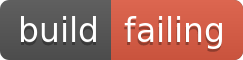

What can you, as a user, conclude from this badge?

Answer: The package has bugs, which is either causing installation to error out or some of the unit tests in the test suite to fail. Since a build failing badge is indicative of bugs, the maintainer of any package should strive to keep this badge green ("passing").

What does code coverage mean?
In a Github repository of a Python package, you see the following badge

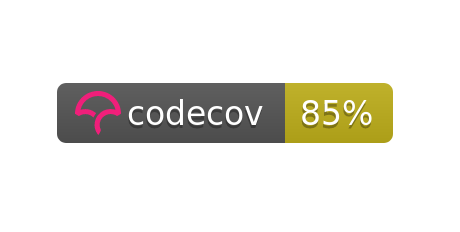

What does it mean?

Answer: The test suite tests about 85% of the application code. 